<a href="https://colab.research.google.com/github/albeme0/testdemo/blob/main/Earnings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###
### Packages
###
!pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=24c5c71ba5e42c336ce68fa0949d2ee3baddd23caa3f050f66e9fd0b7d7d7f08
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [36]:
###
### Imports
###

import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import ta
import matplotlib.pyplot as plt
# import seaborn as sns

In [37]:
###
### Variables
###

plot_w = 18
plot_h = 12

start_year = 2019
end_year = 2023

In [38]:
###
### Func To downlad yf data
###

def download_data(ticker, period):
# Download stock data

    data = yf.download(ticker, period=period)
    data['sma_20'] = data['Close'].rolling(window=20).mean()
    data['std'] = data['Close'].rolling(window=20).std()
    data['sma_5'] = data['Close'].rolling(window=5).mean()
    data['sma_50'] = data['Close'].rolling(window=50).mean()
    data['sma_150'] = data['Close'].rolling(window=150).mean()
    data['sma_200'] = data['Close'].rolling(window=200).mean()

    # Calculate upper and lower bands
    data['upper_band'] = data['sma_20'] + (2 * data['std'])
    data['lower_band'] = data['sma_20'] - (2 * data['std'])

    # Find where close price is above upper or below lower band
    data['>upb_bb20'] = data['Close'] > data['upper_band']
    data['<>upb_bb20'] = data['Close'] < data['lower_band']

    return data



In [60]:
##
### Func  To plot
###
def plot_data(data, plot_w, plot_h):
# Plot stock data

    # Calculate SMA and standard deviation
    sma_20 = data['Close'].rolling(window=20).mean()
    std = data['Close'].rolling(window=20).std()
    sma_5 = data['Close'].rolling(window=5).mean()
    sma_50 = data['Close'].rolling(window=50).mean()
    sma_150 = data['Close'].rolling(window=150).mean()
    sma_200 = data['Close'].rolling(window=200).mean()

    print(sma_20)


    # Calculate upper and lower bands
    upper_band = sma_20 + (2 * std)
    lower_band = sma_20 - (2 * std)

    print(upper_band)
    print(lower_band)

    # Find where close price is above upper or below lower band
    upb_bb20 = data['Close'] > upper_band
    lowb_bb20 = data['Close'] < lower_band

    # Clean Plot
    plt.clf()

    # Plot the chart
    plt.figure(figsize=(plot_w, plot_h))
    plt.plot(data['Close'], label='Close',linewidth=2,  color ='blue')
    plt.plot(data['sma_5'], label='SMA_5',linewidth=1)
    plt.plot(data['sma_20'], label='SMA_20',linewidth=1,color ='teal')
    plt.plot(data['sma_50'], label='SMA_50',linewidth=2,  color ='orange')
    plt.plot(data['sma_150'], label='SMA_150',linewidth=1)
    plt.plot(data['sma_200'], label='SMA_200',linewidth=2, color ='green')
    plt.plot(data['>upb_bb20'], label='Upper Band',linewidth=1, color ='red')
    plt.plot(data['<lwp_bb20'], label='Lower Band',linewidth=1, color ='green')

    # Add red and green marks
    plt.scatter(data.index[upb_bb20], data['Close'][upb_bb20], color='red', label='Above Upper Band')
    plt.scatter(data.index[lowb_bb20], data['Close'][lowb_bb20], color='green', label='Below Lower Band')

   # Calculate max, min, start_period, end_period and growth %
    max_close = data['Close'].max()
    min_close = data['Close'].min()
    start_period = data['Close'].iloc[0]
    end_period = data['Close'].iloc[-1]
    max_min_growth_pct = ((max_close - min_close) / min_close) * 100
    start_end_growth_pct = ((end_period - start_period) / start_period) * 100

    # Add text for max, min, and growth percentages
    plt.text(0.2, 0.97, f"Max-Min Growth %: {max_min_growth_pct:.2f}%", transform=plt.gca().transAxes)
    plt.text(0.2, 0.95, f"Max Close: {max_close:.2f}", transform=plt.gca().transAxes)
    plt.text(0.2, 0.93, f"Min Close: {min_close:.2f}", transform=plt.gca().transAxes)

    # Add text for Start, end, and growth percentages
    plt.text(0.4, 0.97, f"Start-End Growth %: {start_end_growth_pct:.2f}%", transform=plt.gca().transAxes)
    plt.text(0.4, 0.95, f"Start of Period Close: {start_period:.2f}", transform=plt.gca().transAxes)
    plt.text(0.4, 0.93, f"End of Period Close: {end_period:.2f}", transform=plt.gca().transAxes)

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{ticker} Stock Price')

    plt.legend()
    plt.show()


[*********************100%%**********************]  1 of 1 completed

Date
2024-02-20           NaN
2024-02-21           NaN
2024-02-22           NaN
2024-02-23           NaN
2024-02-26           NaN
                 ...    
2024-08-12    175.934501
2024-08-13    173.926001
2024-08-14    172.703500
2024-08-15    171.797500
2024-08-16    171.095999
Name: Close, Length: 125, dtype: float64
Date
2024-02-20           NaN
2024-02-21           NaN
2024-02-22           NaN
2024-02-23           NaN
2024-02-26           NaN
                 ...    
2024-08-12    206.383616
2024-08-13    199.998788
2024-08-14    197.551066
2024-08-15    195.034671
2024-08-16    193.326480
Name: Close, Length: 125, dtype: float64
Date
2024-02-20           NaN
2024-02-21           NaN
2024-02-22           NaN
2024-02-23           NaN
2024-02-26           NaN
                 ...    
2024-08-12    145.485386
2024-08-13    147.853214
2024-08-14    147.855935
2024-08-15    148.560329
2024-08-16    148.865518
Name: Close, Length: 125, dtype: float64


<Figure size 640x480 with 0 Axes>

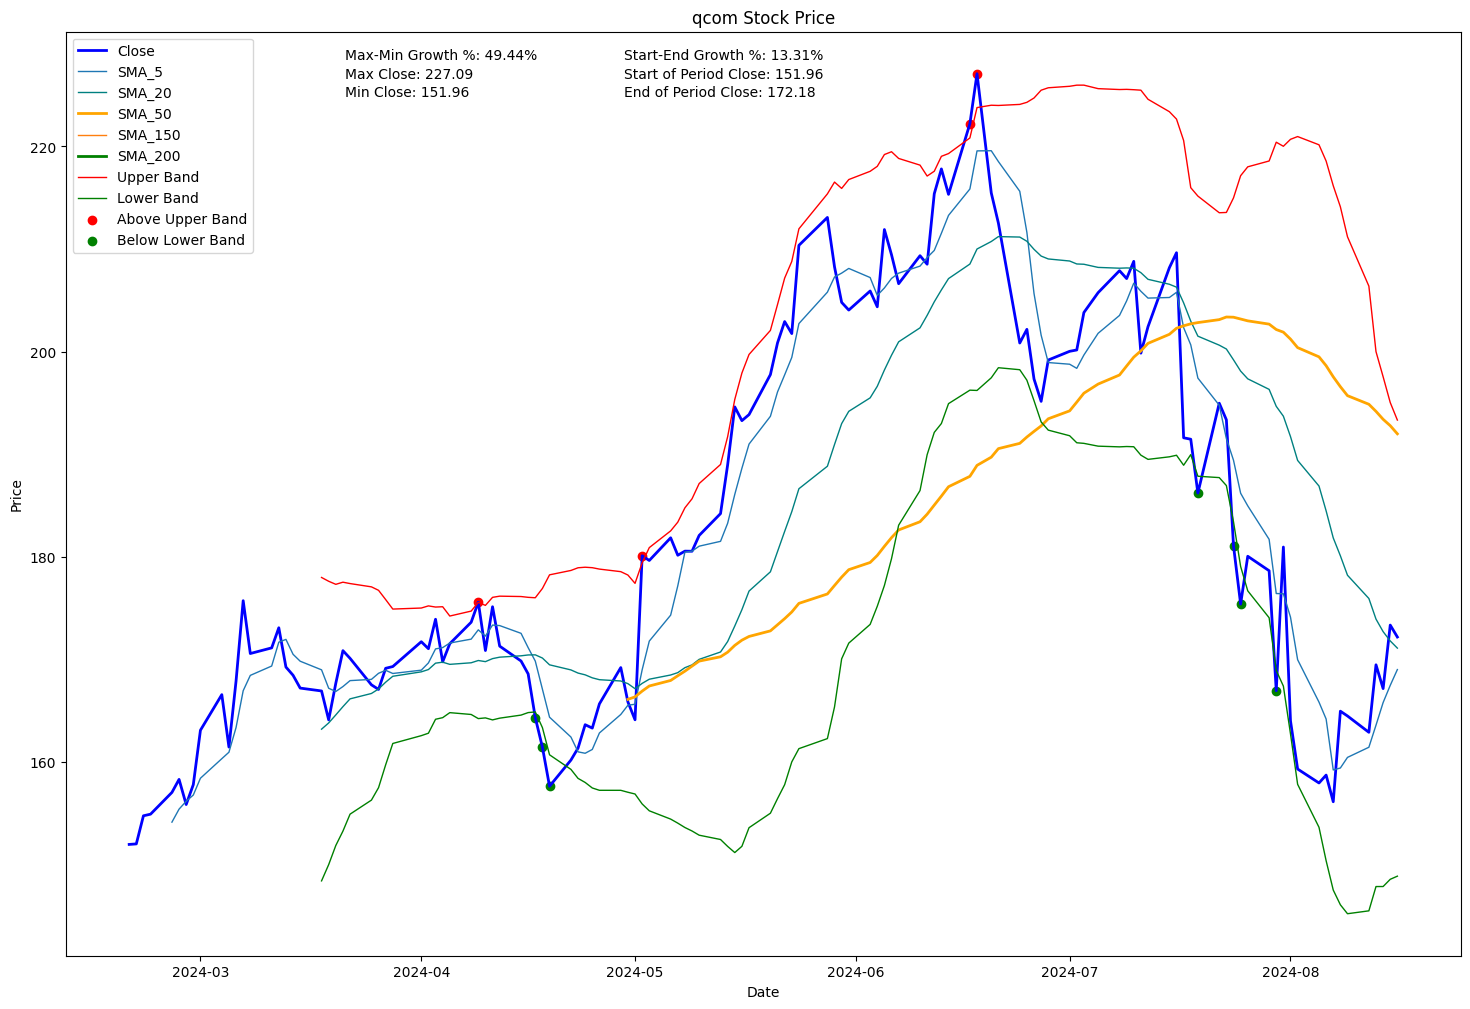

In [61]:
### ~~~~
### MAIN
### ~~~~

if __name__ == '__main__':
  # def ticker and period
  ticker = 'qcom'
  period = '6mo' # 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
  tmp_data = download_data(ticker, period)
  # plot_data(tmp_data, plot_w, plot_h
  plot_data(tmp_data, plot_w, plot_h)
  # tmp_data = get_plot_stock_data(ticker, period)


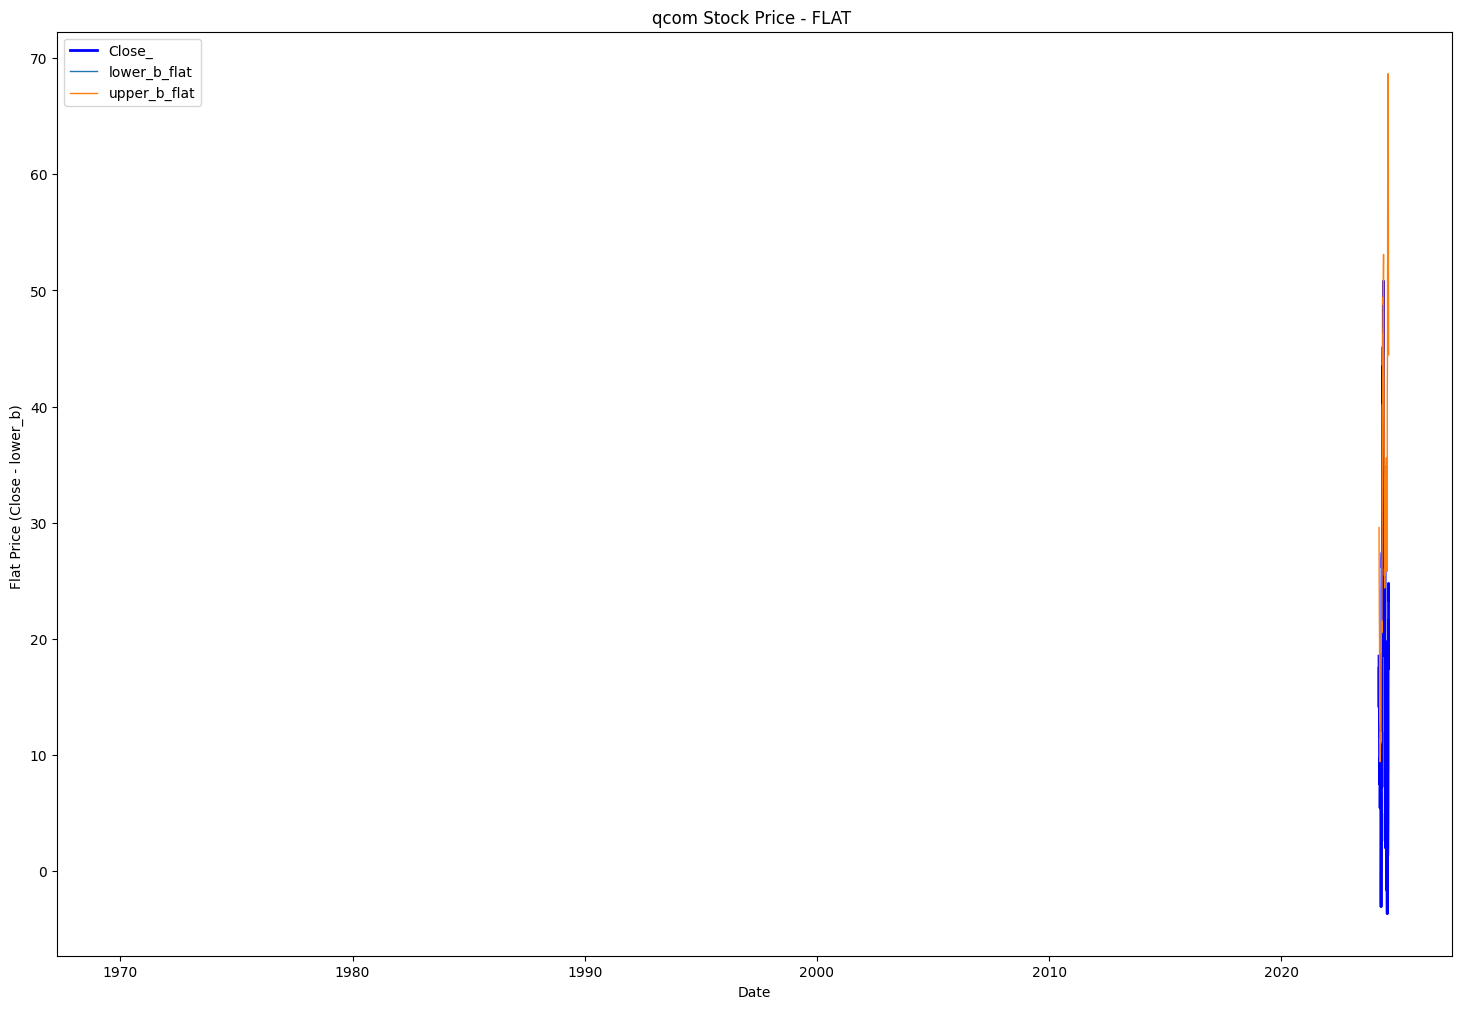

In [54]:
  plot_lowb_flat(tmp_data, plot_w, plot_h)

In [53]:
###
### Func  To plot lowb_flat
###

def plot_lowb_flat(data, plot_w, plot_h):
# Plot stock data

    # Calculate SMA and standard deviation
    sma_20 = data['Close'].rolling(window=20).mean()
    std = data['Close'].rolling(window=20).std()
    sma_5 = data['Close'].rolling(window=5).mean()
    sma_50 = data['Close'].rolling(window=50).mean()
    sma_150 = data['Close'].rolling(window=150).mean()
    sma_200 = data['Close'].rolling(window=200).mean()

    # Calculate upper and lower bands
    upper_band = sma_20 + (2 * std)
    lower_band = sma_20 - (2 * std)

    # flattening to lowb
    close_flat = data['Close'] - lower_band
    lower_band_flat = 0
    upper_band_flat = upper_band - lower_band
#
    # Plot the chart
    plt.figure(figsize=(plot_w, plot_h))
    plt.plot(close_flat , label='Close_',linewidth=2,  color ='blue')
    plt.plot(lower_band_flat, label='lower_b_flat',linewidth=1)
    plt.plot(upper_band_flat, label='upper_b_flat',linewidth=1)

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Flat Price (Close - lower_b) ')
    plt.title(f'{ticker} Stock Price - FLAT ')
#    # Find where close price is above upper or below lower band
#    upb_bb20 = data['Close'] > upper_band
#    lowb_bb20 = data['Close'] < lower_band
#
#    # Calculate max, min, start_period, end_period and growth %
#    max_close = data['Close'].max()
#    min_close = data['Close'].min()
#    start_period = data['Close'].iloc[0]
#    end_period = data['Close'].iloc[-1]
#    max_min_growth_pct = ((max_close - min_close) / min_close) * 100
#    start_end_growth_pct = ((end_period - start_period) / start_period) * 100
#
#    # Clean Plot
#    plt.clf()
#
#    # Plot the chart
#    plt.figure(figsize=(plot_w, plot_h))
#    plt.plot(data['Close'], label='Close',linewidth=2,  color ='blue')
#    plt.plot(sma_5, label='SMA_5',linewidth=1)
#    plt.plot(sma_20, label='SMA_20',linewidth=1,color ='teal')
#    plt.plot(sma_50, label='SMA_50',linewidth=2,  color ='orange')
#    plt.plot(sma_150, label='SMA_150',linewidth=1)
#    plt.plot(sma_200, label='SMA_200',linewidth=2, color ='green')
#    plt.plot(upper_band, label='Upper Band',linewidth=1, color ='red')
#    plt.plot(lower_band, label='Lower Band',linewidth=1, color ='green')
#
#    # Add red and green marks
#    plt.scatter(data.index[upb_bb20], data['Close'][upb_bb20], color='red', label='Above Upper Band')
#    plt.scatter(data.index[lowb_bb20], data['Close'][lowb_bb20], color='green', label='Below Lower Band')
#
#
#    # Add text for max, min, and growth percentages
#    plt.text(0.2, 0.97, f"Max-Min Growth %: {max_min_growth_pct:.2f}%", transform=plt.gca().transAxes)
#    plt.text(0.2, 0.95, f"Max Close: {max_close:.2f}", transform=plt.gca().transAxes)
#    plt.text(0.2, 0.93, f"Min Close: {min_close:.2f}", transform=plt.gca().transAxes)

#    # Add text for Start, end, and growth percentages
#    plt.text(0.4, 0.97, f"Start-End Growth %: {start_end_growth_pct:.2f}%", transform=plt.gca().transAxes)
#    plt.text(0.4, 0.95, f"Start of Period Close: {start_period:.2f}", transform=plt.gca().transAxes)
#    plt.text(0.4, 0.93, f"End of Period Close: {end_period:.2f}", transform=plt.gca().transAxes)
#
    plt.legend()
    plt.show()




In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

def get_earnings_last_5_years(ticker):
  """
  Fetches earnings data for the last 5 years for a given stock ticker.

  Args:
    ticker: The stock ticker symbol.

  Returns:
    A pandas DataFrame containing the earnings data for the last 5 years.
  """

  # Get today's date and calculate the date for 5 years ago
  today = datetime.now()
  five_years_ago = today - timedelta(days=365*5)

  # Fetch the ticker object
  stock = yf.Ticker(ticker)

  # Get earnings data
  earnings_data = stock.earnings

  # Convert earnings data to a DataFrame and set the index to the date
  earnings_df = pd.DataFrame(earnings_data).set_index('Year')

  return earnings_df

# Example usage
ticker = "AAPL"
earnings_data = get_earnings_last_5_years(ticker)
print(earnings_data)

/usr/local/lib/python3.10/dist-packages/yfinance/scrapers/fundamentals.py:33: DeprecationWarning: 'Ticker.earnings' is deprecated as not available via API. Look for "Net Income" in Ticker.income_stmt.
  warnings.warn("'Ticker.earnings' is deprecated as not available via API. Look for \"Net Income\" in Ticker.income_stmt.", DeprecationWarning)


KeyError: "None of ['Year'] are in the columns"

In [16]:
# prompt: add max , min, start_period, end_period and growth % to the plot

def get_plot_stock_data(ticker, period):
    # Download and plot stock data
    plt.clf()

    data = yf.download(ticker, period=period)

    # Calculate SMA and standard deviation
    sma_20 = data['Close'].rolling(window=20).mean()
    std = data['Close'].rolling(window=20).std()
    sma_50 = data['Close'].rolling(window=50).mean()
    sma_200 = data['Close'].rolling(window=200).mean()

    # Calculate upper and lower bands
    upper_band = sma_20 + (2 * std)
    lower_band = sma_20 - (2 * std)

    # Find where close price is above upper or below lower band
    upb_bb20 = data['Close'] > upper_band
    lowb_bb20 = data['Close'] < lower_band

    # Calculate max, min, start_period, end_period and growth %
    max_close = data['Close'].max()
    min_close = data['Close'].min()
    start_period = data['Close'].iloc[0]
    end_period = data['Close'].iloc[-1]
    max_min_growth_pct = ((max_close - min_close) / min_close) * 100
    start_end_growth_pct = ((end_period - start_period) / start_period) * 100

    # Plot the chart
    plt.figure(figsize=(18, 12))
    plt.plot(data['Close'], label='Close',linewidth=2,  color ='blue')
    plt.plot(sma_20, label='SMA_20',linewidth=1,color ='teal')
    plt.plot(sma_50, label='SMA_50',linewidth=2,  color ='orange')
    plt.plot(sma_200, label='SMA_200',linewidth=2, color ='green')
    plt.plot(upper_band, label='Upper Band',linewidth=1, color ='red')
    plt.plot(lower_band, label='Lower Band',linewidth=1, color ='green')

    # Add red and green marks
    plt.scatter(data.index[upb_bb20], data['Close'][upb_bb20], color='red', label='Above Upper Band')
    plt.scatter(data.index[lowb_bb20], data['Close'][lowb_bb20], color='green', label='Below Lower Band')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{ticker} Stock Price')

    # Add text for max, min, and growth percentages
    plt.text(0.2, 0.97, f"Max-Min Growth %: {max_min_growth_pct:.2f}%", transform=plt.gca().transAxes)
    plt.text(0.2, 0.95, f"Max Close: {max_close:.2f}", transform=plt.gca().transAxes)
    plt.text(0.2, 0.93, f"Min Close: {min_close:.2f}", transform=plt.gca().transAxes)

    # Add text for Start, end, and growth percentages
    plt.text(0.4, 0.97, f"Start-End Growth %: {start_end_growth_pct:.2f}%", transform=plt.gca().transAxes)
    plt.text(0.4, 0.95, f"Start of Period Close: {start_period:.2f}", transform=plt.gca().transAxes)
    plt.text(0.4, 0.93, f"End of Period Close: {end_period:.2f}", transform=plt.gca().transAxes)

    plt.legend()
    plt.show()
    return data

# ... (rest of the code)


In [ ]:

import yfinance as yf

def get_stock_data(ticker, start_year, end_year):
    """
    Retrieves stock data from Yahoo Finance for the specified ticker and years.

    Args:
        ticker (str): The stock ticker symbol.
        start_year (int): The starting year for the data.
        end_year (int): The ending year for the data.

    Returns:
        pandas.DataFrame: A DataFrame containing the stock data.
    """

    # Create a ticker object
    ticker_data = yf.Ticker(ticker)

    # Get historical data for the specified period
    hist_data = ticker_data.history(start=f"{start_year}-01-01", end=f"{end_year}-12-31")

    # Calculate earnings, gross profit, net revenues, P/E, growth, and cash flow
    earnings = hist_data['earnings']
    gross_profit = hist_data['grossProfit']
    net_revenues = hist_data['revenue']
    pe_ratio = hist_data['trailingPE']
    growth = hist_data['revenueGrowth']
    cash_flow = hist_data['cashflow']

    # Combine the data into a DataFrame
    data = {
        'Earnings': earnings,
        'Gross Profit': gross_profit,
        'Net Revenues': net_revenues,
        'P/E Ratio': pe_ratio,
        'Growth': growth,
        'Cash Flow': cash_flow
    }
    data = pd.DataFrame(data)

    return data

ticker = 'AAPL'  # Replace with your desired ticker
start_year = 2019
end_year = 2023

stock_data = get_stock_data(ticker, start_year, end_year)
print(stock_data)

KeyError: 'earnings'

In [ ]:
ticker = 'AAPL'  # Replace with your desired ticker
start_year = 2019
end_year = 2023

stock_data = get_stock_data(ticker, start_year, end_year)
print(stock_data)

KeyError: 'earnings'

In [ ]:


tk = "aapl"
start_year = 2019
end_year = 2023


# Create a ticker
tk_d = yf.Ticker(tk)
tk_d.info
tk_d.quarterly_cash_flow
tk_d.quarterly_balance_sheet
tk_d.quarterly_financials
# Get historical data for the specified(MSFT)
#hist_data = ticker_data.history(start=f"{start_year}-01-01", end=f"{end_year}-12-31"(tk))

,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Free Cash Flow,26707000000.0,20694000000.0,37503000000.0,19435000000.0,24287000000.0,NaN,NaN
Repurchase Of Capital Stock,-26522000000.0,-23205000000.0,-20139000000.0,-21003000000.0,-17478000000.0,NaN,NaN
Repayment Of Debt,-3253000000.0,-3148000000.0,-3984000000.0,0.0,-5511000000.0,NaN,NaN
Issuance Of Debt,NaN,NaN,NaN,0.0,NaN,NaN,NaN
Capital Expenditure,-2151000000.0,-1996000000.0,-2392000000.0,-2163000000.0,-2093000000.0,NaN,NaN
Interest Paid Supplemental Data,NaN,NaN,NaN,1213000000.0,717000000.0,1170000000.0,703000000.0
Income Tax Paid Supplemental Data,4699000000.0,7276000000.0,7255000000.0,11659000000.0,2126000000.0,NaN,NaN
End Cash Position,26635000000.0,33921000000.0,41974000000.0,30737000000.0,29898000000.0,NaN,NaN
Beginning Cash Position,33921000000.0,41974000000.0,30737000000.0,29898000000.0,27129000000.0,NaN,NaN
Changes In Cash,-7286000000.0,-8053000000.0,11237000000.0,839000000.0,2769000000.0,NaN,NaN


In [ ]:
tk_d.quarterly_cash_flow


,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Free Cash Flow,26707000000.0,20694000000.0,37503000000.0,19435000000.0,24287000000.0,NaN,NaN
Repurchase Of Capital Stock,-26522000000.0,-23205000000.0,-20139000000.0,-21003000000.0,-17478000000.0,NaN,NaN
Repayment Of Debt,-3253000000.0,-3148000000.0,-3984000000.0,0.0,-5511000000.0,NaN,NaN
Issuance Of Debt,NaN,NaN,NaN,0.0,NaN,NaN,NaN
Capital Expenditure,-2151000000.0,-1996000000.0,-2392000000.0,-2163000000.0,-2093000000.0,NaN,NaN
Interest Paid Supplemental Data,NaN,NaN,NaN,1213000000.0,717000000.0,1170000000.0,703000000.0
Income Tax Paid Supplemental Data,4699000000.0,7276000000.0,7255000000.0,11659000000.0,2126000000.0,NaN,NaN
End Cash Position,26635000000.0,33921000000.0,41974000000.0,30737000000.0,29898000000.0,NaN,NaN
Beginning Cash Position,33921000000.0,41974000000.0,30737000000.0,29898000000.0,27129000000.0,NaN,NaN
Changes In Cash,-7286000000.0,-8053000000.0,11237000000.0,839000000.0,2769000000.0,NaN,NaN


In [ ]:
tk_d.quarterly_balance_sheet


In [ ]:
tk_d.quarterly_financials

,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,0.0,NaN,NaN
Tax Rate For Calcs,0.159,0.158,0.159,0.149715,0.125,NaN,NaN
Normalized EBITDA,28202000000.0,30736000000.0,43221000000.0,30653000000.0,26050000000.0,NaN,NaN
Net Income From Continuing Operation Net Minority Interest,21448000000.0,23636000000.0,33916000000.0,22956000000.0,19881000000.0,NaN,NaN
Reconciled Depreciation,2850000000.0,2836000000.0,2848000000.0,2653000000.0,3052000000.0,NaN,NaN
Reconciled Cost Of Revenue,46099000000.0,48482000000.0,64720000000.0,49071000000.0,45384000000.0,NaN,NaN
EBITDA,28202000000.0,30736000000.0,43221000000.0,30653000000.0,26050000000.0,NaN,NaN
EBIT,25352000000.0,27900000000.0,40373000000.0,28000000000.0,22998000000.0,NaN,NaN
Net Interest Income,NaN,NaN,NaN,-18000000.0,-18000000.0,-12000000.0,-135000000.0
Interest Expense,NaN,NaN,NaN,1002000000.0,998000000.0,930000000.0,1003000000.0


In [ ]:
# prompt: using ta check if stock is close to bollinger band

import ta

# Assuming 'hist_data' is a DataFrame containing historical stock data with 'Close' column
close_prices = hist_data['Close']

# Initialize Bollinger Bands indicator
indicator_bb = ta.volatility.BollingerBands(close=close_prices)

# Get Bollinger Bands values
bb_high = indicator_bb.bollinger_hband()
bb_low = indicator_bb.bollinger_lband()

# Check if the last closing price is close to the bands
last_close = close_prices.iloc[-1]
close_to_bands = (last_close >= bb_low.iloc[-1] * 0.98) and (last_close <= bb_high.iloc[-1] * 1.02)

print(f"Stock is close to Bollinger Bands: {close_to_bands}")


In [ ]:
tmp_data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-16,202.059998,203.169998,197.399994,199.949997,199.949997,111173600
2024-02-20,196.130005,198.600006,189.130005,193.759995,193.759995,104545800
2024-02-21,193.360001,199.440002,191.949997,194.770004,194.770004,103844000
2024-02-22,194.000000,198.320007,191.360001,197.410004,197.410004,92739500
2024-02-23,195.309998,197.570007,191.500000,191.970001,191.970001,78841900


In [ ]:
# prompt: Using dataframe tmp_data: add a column to track when close is < lower_band

# Calculate lower band (replace with your actual lower band calculation)
tmp_data['lower_band'] = tmp_data['Close'].rolling(window=20).mean() - 2 * tmp_data['Close'].rolling(window=20).std()

# Create a new column to track when close is below the lower band
tmp_data['close_lowb_bb20'] = tmp_data['Close'] < tmp_data['lower_band']
Count = tmp_data['close_lowb_bb20'].value_counts()
print(Count, '=close_lowb_bb20' )
tmp_data.head()


close_below_lower
False    235
True      17
Name: count, dtype: int64 =close_below_lower


,Open,High,Low,Close,Adj Close,Volume,lower_band,close_below_lower
Date,,,,,,,,
2023-08-16,117.160004,117.809998,115.269997,115.339996,113.786385,5722000,NaN,False
2023-08-17,115.739998,116.779999,114.360001,114.879997,113.332581,6183900,NaN,False
2023-08-18,114.500000,116.989998,113.949997,116.459999,114.891304,9411600,NaN,False
2023-08-21,116.900002,117.349998,115.190002,116.589996,115.019562,5811200,NaN,False
2023-08-22,117.510002,117.680000,115.730003,116.540001,114.970238,4961100,NaN,False


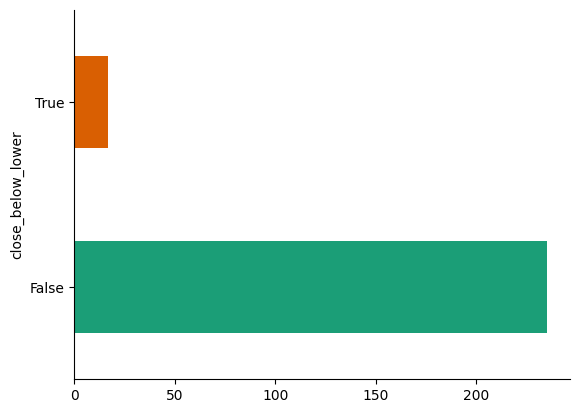

In [ ]:
# @title close_lowb_bb20

from matplotlib import pyplot as plt
import seaborn as sns
tmp_data.groupby('close_lowb_bb20').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# New Section

In [ ]:
# prompt: Using dataframe tmp_data: find max, min, growth %

# Calculate max, min, and growth percentage
max_close = tmp_data['Close'].max()
min_close = tmp_data['Close'].min()
max_min_growth_pct = ((max_close - min_close) / min_close) * 100

print("Max Close:", max_close)
print("Min Close:", min_close)
print("Max-Min Growth %:", max_min_growth_pct)

# prompt: #calculate start_period, end_period, and growth percenatage

# Calculate start_period, end_period, and growth percentage
start_period = tmp_data['Close'].iloc[0]
end_period = tmp_data['Close'].iloc[-1]
start_end_growth_pct = ((end_period - start_period) / start_period) * 100

print("Start of Period Close:", start_period)
print("End of Period Close:", end_period)
print("Start-End Growth %:", start_end_growth_pct)

Max Close: 263.260009765625
Min Close: 142.0500030517578
Max-Min Growth %: 85.32911236172428
Start of Period Close: 199.9499969482422
End of Period Close: 214.13999938964844
Start-End Growth %: 7.0967755228720435


In [ ]:
# prompt: #calculate start_period, end_period, and growth percenatage

# Calculate start_period, end_period, and growth percentage
start_period = tmp_data['Close'].iloc[0]
end_period = tmp_data['Close'].iloc[-1]
start_end_growth_pct = ((end_period - start_period) / start_period) * 100

print("Start of Period Close:", start_period)
print("End of Period Close:", end_period)
print("Start-End Growth %:", start_end_growth_pct)


Start of Period Close: 199.9499969482422
End of Period Close: 214.13999938964844
Start-End Growth %: 7.0967755228720435
